<a href="https://colab.research.google.com/github/qd6666/XBD-codes/blob/main/de_duplicate_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:

import hashlib
from scipy import misc as misc
#from misc import imread, imresize, imshow

#from imageio import imread, imresize, imshow
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import time
import numpy as np

from keras.preprocessing.image import save_img
from PIL import Image
import matplotlib.pyplot as plt


In [25]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [27]:
print(os.getcwd())

/content/drive/My Drive


In [26]:
cd 'drive/MyDrive/'

[Errno 2] No such file or directory: 'drive/MyDrive/'
/content/drive/MyDrive


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


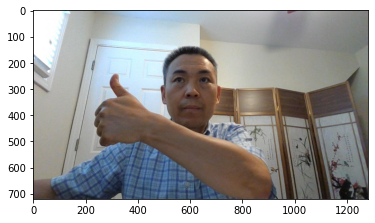

In [28]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/drive/MyDrive/thumbup02.jpg')
imgplot = plt.imshow(img)
plt.show()

Removing Duplicate Images Using Hashing

In [29]:
def file_hash(filepath):
    with open(filepath, 'rb') as f:
        return md5(f.read()).hexdigest()

In [30]:
import os
print(os.getcwd())
file_list = os.listdir()
print(len(file_list))

/content/drive/MyDrive
8


In [31]:
import hashlib, os
duplicates = []
hash_keys = dict()
for index, filename in  enumerate(os.listdir('.')):  #listdir('.') = current directory
    if os.path.isfile(filename):
        with open(filename, 'rb') as f:
            filehash = hashlib.md5(f.read()).hexdigest()
        if filehash not in hash_keys: 
            hash_keys[filehash] = index
        else:
            duplicates.append((index,hash_keys[filehash]))

In [33]:
duplicates

[]

In [37]:
for file_indexes in duplicates[:30]:
    try:
    
        plt.subplot(121),plt.imshow(imread(file_list[file_indexes[1]]))
        plt.title(file_indexes[1]), plt.xticks([]), plt.yticks([])

        plt.subplot(122),plt.imshow(imread(file_list[file_indexes[0]]))
        plt.title(str(file_indexes[0]) + ' duplicate'), plt.xticks([]), plt.yticks([])
        plt.show()
    
    except OSError as e:
        continue

In [38]:
for index in duplicates:
    os.remove(file_list[index[0]])